<a href="https://colab.research.google.com/github/shehanshaman/fyp_short_sem/blob/master/Feature_selection_using_correlation_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [76]:
import numpy as np
import pandas as pd

df = pd.read_pickle("drive/My Drive/FYP/dataset/GSE5281/GSE5281_DE_200.plk")
# df = pd.read_pickle("drive/My Drive/FYP/dataset/GSE5281/GSE5281_DE_2311.plk")
df.head()

Symbol,SST,CHGB,CALY,CHRM1,GOT1,STAT4,NME1,AC004951.6,AX747182,SERTM1,PCSK1,ATP6V1G2,MT1M,GPI,LOC101929787,LOC100272216,MAFF,KIFAP3,MAL2,AMPH,SLC39A12,MTX2,MIR612,NEAT1,ZIC2,PCYOX1L,TAC1,ZNF204P,JPX,MDH1,CCK,PSMB3,NIT2,ATP5B,TMEM200A,ATP6V1B2,DHCR24,SLIRP,VSNL1,MGC12488,...,TM9SF2,CCNH,SLC12A7,APLNR,MAP2K1,SLC35B1,CACNA2D3,PCDH8,GLRB,NEFL,YAP1,NRSN1,SLC9A6,CAPNS1,ALAS1,FIG4,PSENEN,GFAP,IMMT,SUCLA2,FHL2,AK090844,RAB33A,ZCCHC24,PPEF1,MLLT11,RGS4,SLC16A14,SNCA,PRR34-AS1,RGS7,NRXN3,NAA20,UCHL3,HACL1,ATP6V0B,ATP1A1,SLITRK4,MAP7D2,class
GSM119615,8.131880,8.038977,5.151241,5.960189,6.496582,5.177266,6.735126,4.923159,4.923159,5.585295,5.573235,8.434417,3.951437,6.968975,5.885994,6.083629,4.681431,6.380428,8.110305,8.915695,6.329852,7.560527,5.166372,5.166372,5.868591,6.328347,8.347192,7.275703,2.934900,10.763783,9.171231,6.893028,6.257113,8.455516,7.526488,8.284930,6.960068,7.639021,10.283798,4.911598,...,6.481914,7.011247,6.635072,4.528372,8.128725,5.278402,7.828262,9.860453,6.917989,9.267750,4.186140,8.675869,9.841581,6.251841,5.816591,7.935832,4.435020,7.054613,7.414872,7.961066,5.799641,5.298147,5.783877,7.456909,3.927690,10.847098,7.307455,8.620085,7.958731,6.325037,6.384926,7.623302,7.276087,5.246386,4.698036,6.566670,8.079477,7.012174,8.392132,0
GSM119616,9.505370,6.843639,5.565685,8.256848,6.808876,5.937782,7.084662,4.308553,4.308553,5.424460,4.320161,8.430603,4.281796,8.000928,5.867583,5.881952,4.849331,4.707004,6.259058,8.320264,3.686194,6.720044,4.380328,4.380328,4.223862,7.514385,5.181012,6.709932,2.920651,9.269761,7.808680,8.121838,6.331245,8.937122,8.268992,7.795785,7.118234,8.470085,9.097778,4.862214,...,5.992824,6.292830,6.375591,5.458683,7.259421,6.062100,7.621714,8.018103,6.181431,8.943403,3.566653,7.639978,9.082520,7.135552,6.144733,9.000454,4.363489,7.491630,6.946851,7.412511,6.767040,5.279988,6.146401,7.418142,5.079694,11.668155,7.324564,7.498362,7.426317,6.648298,6.447447,6.868568,6.718846,4.696639,5.302263,6.957373,8.561748,6.600915,8.290398,0
GSM119617,5.369160,4.665645,4.252331,6.834361,4.808397,4.486761,5.409682,5.665046,5.665046,3.364531,3.173762,5.653338,5.513703,6.178967,4.493120,6.389841,4.266874,3.454873,3.314502,5.044705,3.599311,4.476322,4.598128,4.598128,4.741784,5.884224,2.750926,4.544694,2.957573,6.592042,5.094963,5.935664,3.925424,7.702212,4.875246,5.456936,4.877980,6.446468,6.502673,5.294911,...,4.393931,4.383398,6.730196,5.016607,5.234606,4.735439,4.595901,4.923356,4.103622,5.937121,3.534403,6.366537,6.387074,6.485473,4.318861,8.097815,3.472717,7.186470,5.193497,4.871446,5.890325,6.716955,4.677529,7.630651,3.765344,9.503726,5.363508,4.069276,5.191100,6.747926,5.840032,5.171308,4.926782,3.523475,3.793645,5.613994,6.183599,3.677790,6.366832,0
GSM119618,5.999060,5.293017,5.245800,7.863578,4.886358,4.517919,4.878878,5.699413,5.699413,3.256316,3.239969,6.032224,5.696868,6.902142,4.852395,6.174321,4.890228,3.162665,3.420588,6.075690,3.675883,5.037034,4.777270,4.777270,4.456430,6.072395,3.954933,4.304102,3.929218,6.965705,5.701809,6.574085,4.373662,7.954236,4.715554,5.423112,5.092454,6.445284,7.277838,5.940631,...,4.946065,4.509396,6.818696,5.455425,4.170590,4.704986,4.562267,5.021351,4.262546,6.659974,3.333360,6.384433,7.335424,6.555934,4.342724,8.521468,3.992268,7.553568,5.467763,4.919411,5.698300,6.608849,5.180804,7.807734,3.603359,10.139533,5.626352,4.978548,6.106691,7.378966,5.936174,5.411828,5.461794,3.848761,4.159845,6.010982,6.505356,4.053398,7.139060,0
GSM119619,9.820469,9.230820,6.719501,7.177746,7.966393,6.153760,8.338353,3.590518,3.590518,6.930045,6.690597,8.947760,4.743912,8.350846,5.228459,6.785353,5.220601,7.127253,9.211837,9.256675,5.360266,7.971362,4.845992,4.845992,4.778356,6.846255,9.312080,7.200142,3.003917,11.759778,9.423194,7.365393,7.489957,9.778586,8.368750,10.092938,8.010270,8.065691,10.858154,4.673697,...,8.024168,7.967964,5.854620,4.936726,8.956529,6.474409,8.466506,9.983657,7.696830,10.167188,4.075549,8.777251,9.862478,7.814851,7.751669,8.701667,5.069903,6.793184,7.869865,8

In [0]:
X = df.drop("class",1)
y = df["class"]

In [0]:
# from sklearn import preprocessing

# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(X)
# df = pd.DataFrame(x_scaled,index=[X.index.values])

# df.columns =  X.columns.values

# df["class"] = y.values

In [0]:
# df.head()

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

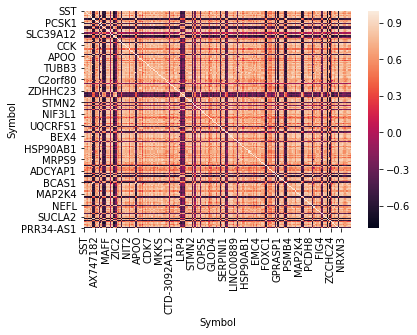

In [7]:
corr = X.corr()
sns.heatmap(corr)

In [0]:
# df_tmp.head()

In [0]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics

from sklearn.model_selection import cross_val_score

def svmLinear(dataFrame, target):

  clf = svm.SVC(kernel='linear') # Linear Kernel
  scores = cross_val_score(clf, dataFrame, target, cv=3)

  return scores.mean()

from sklearn.svm import SVC

def svmGaussian(dataFrame, target):

  #Create a svm Classifier
  clf = SVC(kernel="rbf", gamma="auto", C=1)
  scores = cross_val_score(clf, dataFrame, target, cv=3)

  return scores.mean()

from sklearn.ensemble import RandomForestClassifier

def randomForest(dataFrame, target):

  #Create a svm Classifier
  clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=42)
  scores = cross_val_score(clf, dataFrame, target, cv=3)

  return scores.mean()

In [0]:
def getSelectedDF(df, corr, ran):
  columns = np.full((corr.shape[0],), True, dtype=bool)
  for i in range(corr.shape[0]):
      for j in range(i+1, corr.shape[0]):
          if corr.iloc[i,j] >= ran or corr.iloc[i,j] <= -ran:
              if columns[j]:
                  columns[j] = False

  selected_columns = df.columns[columns]
  df_selected = df[selected_columns]

  return df_selected


In [0]:
def returnScoreDataFrame(dataFrame):
  lists0 = []
  lists1 = []
  lists2 = []
  lists3 = []
  lists4 = []

  i = 1

  while i >= 0.6:
  # for i in range(0,50):
    df_tmp = dataFrame
    df_tmp = getSelectedDF(df_tmp, df_tmp.corr(), i)

    lists0.append(i)
    lists1.append(svmLinear(df_tmp, y))
    lists2.append(svmGaussian(df_tmp, y))
    lists3.append(randomForest(df_tmp, y))
    lists4.append(len(df_tmp.columns))

    i = i - 0.0025

  rows = ["i", "svmLinear", "svmGaussian", "randomForest", "No of features"]

  data = np.array([lists0, lists1, lists2,lists3, lists4])
  results = pd.DataFrame(data=data, index=rows).transpose()

  return results

In [0]:
pca_col = ['STAT4', 'AMPH', 'ZIC2', 'TAC1', 'TMEM200A', 'SLIRP', 'SLC39A10', 'SPHKAP', 'CALB1', 'CDK7', 'AP2M1', 'PLK2', 'P2RY14', 'EMX2', 'SERPINF1', 'ARPC1A', 'PVALB', 'LOC101060510', 'VAMP7', 'LSM7', 'ATP1A3', 'PCP4', 'EXOC8', 'RIT2', 'BCAS1', 'PSMB4', 'LAMP5', 'PCDH8', 'NRSN1', 'CAPNS1', 'ALAS1', 'RAB33A', 'SLC16A14', 'HACL1']
rf_col = ['SLC12A7', 'CKMT1B', 'ATP6V1E1', 'ATP5B', 'LOC100272216', 'REEP1', 'CHRM1', 'COPG2IT1', 'TUBB3', 'PSMB3', 'MIF', 'CDK5', 'IMMT', 'PSMA5', 'PLSCR4', 'LRP4', 'BSCL2', 'ATP5C1']
fi_col = ['TARBP1', 'C2orf80', 'CCNH', 'RNF175', 'EPDR1', 'FAM107B', 'FPGT-TNNI3K', 'DHCR24', 'GLRB', 'TUBA4A', 'HMP19', 'SERPINI1', 'NRXN3', 'SUCLA2', 'SDR16C5', 'C12orf10', 'GRAMD3', 'RPH3A']
all_found = ['AC004951.6','MAFF', 'SLC39A12', 'PCYOX1L', 'CTD-3092A11.2' ,'RP11-271C24.3',
            'PRO1804' ,'PRR34-AS1']

In [0]:
corrScore = returnScoreDataFrame(X[pca_col])

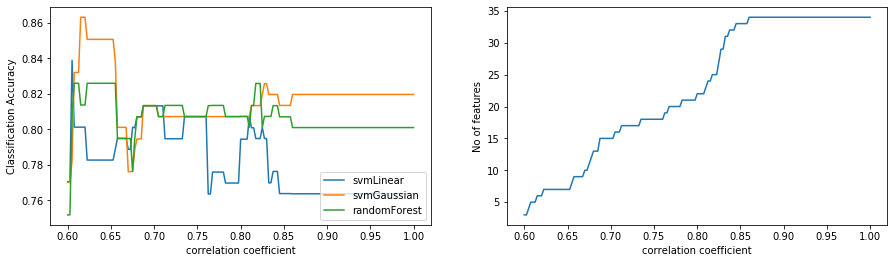

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(corrScore['i'], corrScore["svmLinear"], label='linear')
ax1.plot(corrScore['i'], corrScore["svmGaussian"], label='linear')
ax1.plot(corrScore['i'], corrScore["randomForest"], label='linear')

ax1.legend(['svmLinear', 'svmGaussian', 'randomForest', 'No of features'], loc='lower right')

ax1.set(xlabel='correlation coefficient', ylabel='Classification Accuracy')

ax2.plot(corrScore['i'], corrScore["No of features"], label='linear')
ax2.set(xlabel='correlation coefficient', ylabel='No of features')

fig.subplots_adjust(wspace = 0.2)
fig.set_figwidth(15)

# plt.savefig('drive/My Drive/FYP/plots/select_9_PCA.png', dpi=400)

plt.show()

Find maximum acuracy

In [16]:
corrScore.head()

,i,svmLinear,svmGaussian,randomForest,No of features
0,1.0000,0.763685,0.81959,0.800955,34.0
1,0.9975,0.763685,0.81959,0.800955,34.0
2,0.9950,0.763685,0.81959,0.800955,34.0
3,0.9925,0.763685,0.81959,0.800955,34.0
4,0.9900,0.763685,0.81959,0.800955,34.0


In [17]:
print("Max of svmLinear")
print(corrScore.loc[corrScore['svmLinear'].idxmax()])
print("\n Max of svmGussian")
print(corrScore.loc[corrScore['svmGaussian'].idxmax()])
print("\n Max of randomForest")
print(corrScore.loc[corrScore['randomForest'].idxmax()])

Max of svmLinear
i                 0.605000
svmLinear         0.838807
svmGaussian       0.782553
randomForest      0.807594
No of features    4.000000
Name: 158, dtype: float64

 Max of svmGussian
i                 0.620000
svmLinear         0.801188
svmGaussian       0.863033
randomForest      0.813650
No of features    6.000000
Name: 152, dtype: float64

 Max of randomForest
i                 0.655000
svmLinear         0.788842
svmGaussian       0.838225
randomForest      0.825879
No of features    8.000000
Name: 138, dtype: float64


Max accuracy

* SVM + Linear 0.9325 -> 93.25 -> 179
* SVM + Gausin 0.7875 -> 91.91 ->  44
* RF           0.7425 -> 90.05 ->  26

Save gene symbols

In [0]:
def saveFoundSymbols(df, name):
  tmp_df = pd.DataFrame( df.columns)
  # tmp_df.head()
  tmp_df.to_pickle("drive/My Drive/FYP/Found genes/" + name +".pkl")

Compare training and testing accuracy

In [0]:
def printTop3ClassificationResults(X_train, X_test, y_train, y_test): 
    
  svm_li_clf = svm.SVC(kernel='linear') # Linear Kernel
  score_svm_li = cross_val_score(svm_li_clf, X_train, y_train, cv=3)
  svm_li_clf.fit(X_train, y_train)

  svm_rbf_clf = SVC(kernel="rbf", gamma="auto", C=1)
  score_svm_rbf = cross_val_score(svm_rbf_clf, X_train, y_train, cv=3)
  svm_rbf_clf.fit(X_train, y_train)
  
  RF_clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=42)
  score_RF = cross_val_score(RF_clf, X_train, y_train, cv=3)
  RF_clf.fit(X_train, y_train)

  y_pred_svm_li = svm_li_clf.predict(X_test)
  y_pred_svm_rbf = svm_rbf_clf.predict(X_test)
  y_pred_RF = RF_clf.predict(X_test)

  # y_pred_svm_li_tr = svm_li_clf.predict(X_train)
  # y_pred_svm_rbf_tr = svm_rbf_clf.predict(X_train)
  # y_pred_RF_tr = RF_clf.predict(X_train)
    
  # comparing actual response values (y_test) with predicted response values (y_pred) 
  print("\t\t\t\t\t\t Testing\t Training")
  print("SVM + Gaussian kernel model accuracy(in %) \t:" , round(metrics.accuracy_score(np.int64(y_test.values), y_pred_svm_rbf)*100,2) ,"\t", round(score_svm_rbf.mean()*100,2))
  print("SVM + linear kerne model accuracy(in %) \t:" , round(metrics.accuracy_score(np.int64(y_test.values), y_pred_svm_li)*100,2) ,"\t", round(score_svm_li.mean()*100,2))
  print("Random forest model accuracy(in %) \t\t:" , round(metrics.accuracy_score(np.int64(y_test.values), y_pred_RF)*100,2) ,"\t", round(score_svm_li.mean()*100,2))


def getTop3ClassificationResults(X_train, X_test, y_train, y_test):
  svm_li_clf = svm.SVC(kernel='linear') # Linear Kernel
  score_svm_li = cross_val_score(svm_li_clf, X_train, y_train, cv=3)
  svm_li_clf.fit(X_train, y_train)

  svm_rbf_clf = SVC(kernel="rbf", gamma="auto", C=1)
  score_svm_rbf = cross_val_score(svm_rbf_clf, X_train, y_train, cv=3)
  svm_rbf_clf.fit(X_train, y_train)
  
  RF_clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=42)
  score_RF = cross_val_score(RF_clf, X_train, y_train, cv=3)
  RF_clf.fit(X_train, y_train)

  y_pred_svm_li = svm_li_clf.predict(X_test)
  y_pred_svm_rbf = svm_rbf_clf.predict(X_test)
  y_pred_RF = RF_clf.predict(X_test)

  m = np.array([[round(metrics.accuracy_score(np.int64(y_test.values), y_pred_svm_rbf)*100,2) , round(score_svm_rbf.mean()*100,2)], 
                [round(metrics.accuracy_score(np.int64(y_test.values), y_pred_svm_li)*100,2) , round(score_svm_li.mean()*100,2)],
                [round(metrics.accuracy_score(np.int64(y_test.values), y_pred_RF)*100,2) , round(score_svm_li.mean()*100,2)]])
  
  return m


ROC curves 

In [0]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

def getROC(X_train, X_test, y_train, y_test):

  classifier_SVM_li = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                  random_state=42))
  classifier_SVM_gu = OneVsRestClassifier(svm.SVC(kernel='rbf', probability=True,
                                  random_state=42))
  classifier_RF = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=42)

  y_score_SVM_li = classifier_SVM_li.fit(X_train, y_train).decision_function(X_test)
  y_score_SVM_gu = classifier_SVM_gu.fit(X_train, y_train).decision_function(X_test)
  y_score_SVM_RF = classifier_RF.fit(X_train, y_train)

  fpr_li, tpr_li, _ = roc_curve(np.int64(y_test.ravel()), y_score_SVM_li.ravel())
  fpr_gu, tpr_gu, _ = roc_curve(np.int64(y_test.ravel()), y_score_SVM_gu.ravel())

  roc_auc_li = auc(fpr_li, tpr_li)
  roc_auc_gu = auc(fpr_gu, tpr_gu)

  y_pred_proba_RF = classifier_RF.predict_proba(X_test)[::,1]
  fpr_RF, tpr_RF, _ = metrics.roc_curve(np.int64(y_test.values),  y_pred_proba_RF)
  roc_auc_RF = metrics.roc_auc_score(np.int64(y_test.values), y_pred_proba_RF)

  plt.plot(fpr_li,tpr_li,label="SVM linear, auc="+str(round(roc_auc_li,2)))
  plt.plot(fpr_gu,tpr_gu,label="SVM gaussian, auc="+str(round(roc_auc_gu,2)))
  plt.plot(fpr_RF,tpr_RF,label="Random forest, auc="+str(round(roc_auc_RF,2)))

  plt.ylabel("Sensitivity")
  plt.xlabel("1 - Specificity")

  plt.legend(loc="lower right")

1 SVM linear

In [0]:
# df_tmp.columns

(161, 6)
						 Testing	 Training
SVM + Gaussian kernel model accuracy(in %) 	: 91.84 	 84.8
SVM + linear kerne model accuracy(in %) 	: 95.92 	 80.3
Random forest model accuracy(in %) 		: 91.84 	 80.3


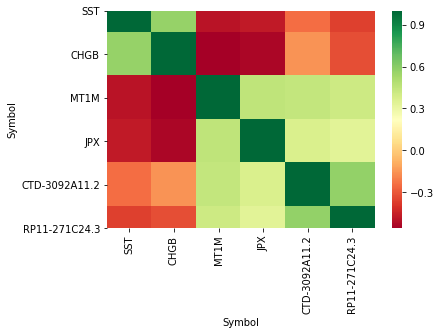

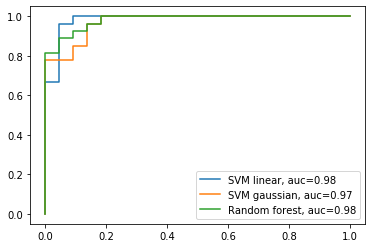

In [22]:
# SVM linear
df_tmp = X
df_tmp = getSelectedDF(df_tmp, df_tmp.corr(), 0.605)
print(df_tmp.shape)
sns.heatmap(df_tmp.corr(), cmap="RdYlGn")

X_train, X_test, y_train, y_test = train_test_split(df_tmp, y, test_size=0.3, random_state=42) 
printTop3ClassificationResults(X_train, X_test, y_train, y_test) #same dataset

# X_Test = df_Test[df_tmp.columns]
# y_Test = df_Test["class"]
# printTop3ClassificationResults(df_tmp, X_Test, y, y_Test) #other dataset

fig2 = plt.subplots(nrows=1, ncols=1) # two axes on figure

getROC(X_train, X_test, y_train, y_test)
# getROC(df_tmp, X_Test, y, y_Test)

#save columns
# saveFoundSymbols(df_tmp,"brain_corr_179")

2 SVM Gaussian

(161, 6)
						 Testing	 Training
SVM + Gaussian kernel model accuracy(in %) 	: 91.84 	 84.8
SVM + linear kerne model accuracy(in %) 	: 95.92 	 80.3
Random forest model accuracy(in %) 		: 91.84 	 80.3


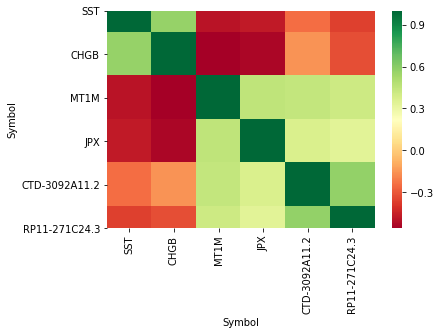

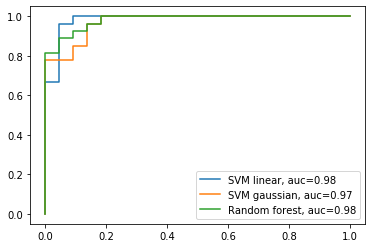

In [23]:
df_tmp = X
df_tmp = getSelectedDF(df_tmp, df_tmp.corr(), 0.620)
print(df_tmp.shape)
sns.heatmap(df_tmp.corr(), cmap="RdYlGn")

X_train, X_test, y_train, y_test = train_test_split(df_tmp, y, test_size=0.3, random_state=42) 
printTop3ClassificationResults(X_train, X_test, y_train, y_test) #same dataset

# X_Test = df_Test[df_tmp.columns]
# y_Test = df_Test["class"]
# printTop3ClassificationResults(df_tmp, X_Test, y, y_Test) #other dataset

fig2 = plt.subplots(nrows=1, ncols=1) # two axes on figure

getROC(X_train, X_test, y_train, y_test)
# getROC(df_tmp, X_Test, y, y_Test)

# saveFoundSymbols(df_tmp,"brain_corr_44")

3 Random Forest

(161, 9)
						 Testing	 Training
SVM + Gaussian kernel model accuracy(in %) 	: 93.88 	 84.8
SVM + linear kerne model accuracy(in %) 	: 93.88 	 85.63
Random forest model accuracy(in %) 		: 91.84 	 85.63


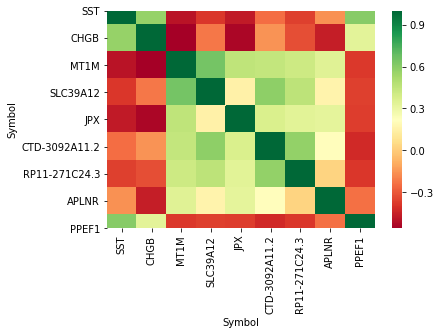

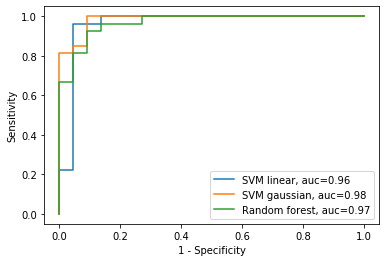

In [70]:
df_tmp = X
df_tmp = getSelectedDF(df_tmp, df_tmp.corr(), 0.655)
print(df_tmp.shape)
# plt.figure(figsize=(15,15))
g = sns.heatmap(df_tmp.corr(), cmap="RdYlGn")

# figure = g.get_figure()    
# figure.savefig('drive/My Drive/FYP/plots/PCA9_heatmap.png', dpi=400)

X_train, X_test, y_train, y_test = train_test_split(df_tmp, y, test_size=0.3, random_state=42) 
printTop3ClassificationResults(X_train, X_test, y_train, y_test) #same dataset

# X_Test = df_Test[df_tmp.columns]
# y_Test = df_Test["class"]
# printTop3ClassificationResults(df_tmp, X_Test, y, y_Test) #other dataset

fig2 = plt.subplots(nrows=1, ncols=1) # two axes on figure

getROC(X_train, X_test, y_train, y_test)
plt.savefig('drive/My Drive/FYP/plots/roc9.png', dpi=400)
# getROC(df_tmp, X_Test, y, y_Test)

# saveFoundSymbols(df_tmp,"brain_corr_26")

In [0]:
final_pca_col = df_tmp.columns.values.tolist()

In [0]:
from sklearn.model_selection import train_test_split 

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics

from nltk.classify.scikitlearn import SklearnClassifier 
from sklearn.model_selection import cross_val_score

from sklearn import svm

In [27]:
df_Test = pd.read_pickle("drive/My Drive/FYP/dataset/GSE84422/GSE84422_24438_Test_set.plk")
df_Test.head()

,Unidentified,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A4GALT,A4GNT,AA06,AAAS,AACS,AACSP1,AADAC,AADACL2,AADACP1,AADAT,AAED1,AAGAB,AAK1,AAMDC,AAMP,AANAT,AAR2,AARS,AARS2,AARSD1,AASDH,AASDHPPT,AASS,AATF,AATK,AB074162,AB488780,ABAT,ABCA1,ABCA11P,ABCA12,ABCA13,...,ZSCAN12P1,ZSCAN16,ZSCAN16-AS1,ZSCAN18,ZSCAN2,ZSCAN20,ZSCAN21,ZSCAN22,ZSCAN23,ZSCAN25,ZSCAN26,ZSCAN29,ZSCAN30,ZSCAN31,ZSCAN32,ZSCAN4,ZSCAN5A,ZSCAN9,ZSWIM1,ZSWIM2,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZSWIM7,ZSWIM8,ZSWIM8-AS1,ZUFSP,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,class
GSM2233519,9.044155,3.072017,2.824990,2.065189,5.577840,2.215263,2.041750,1.501308,2.404777,1.444681,2.505343,3.963773,6.892670,1.871970,1.735989,1.361680,1.868899,3.469376,4.488530,3.579794,5.424184,4.497863,5.608313,1.879048,3.503840,8.723356,4.324236,4.048352,5.758908,6.424605,3.341448,6.568828,5.440441,2.690844,3.953657,8.484479,4.281676,3.933419,2.115783,1.448033,...,1.769994,3.140786,2.829476,4.838955,2.498795,2.039017,4.550174,2.089996,1.893957,2.619289,4.573122,6.747883,2.931090,5.692332,2.986864,1.474619,2.365860,2.344316,3.161656,1.595761,2.520880,2.642704,2.081881,8.619722,5.171381,3.661470,2.074433,4.748661,3.294375,4.094290,3.129125,2.389375,2.929552,3.594786,1.785258,8.511714,4.389656,3.695417,5.302495,0
GSM2233520,8.959608,2.996954,3.096580,1.884293,4.992982,2.638350,1.950359,1.380743,2.016256,1.434748,2.235703,3.918965,7.444215,1.838379,1.553344,1.805002,1.452866,3.114830,4.085929,3.627193,5.871913,4.072274,5.764436,1.777712,3.887493,9.060799,4.017485,4.456306,5.452443,6.670231,3.328393,6.411521,6.015084,2.257711,3.801619,8.476843,3.545012,4.061877,1.678724,1.334206,...,2.068001,3.096813,2.688523,4.705133,2.414472,1.942822,4.663277,1.839193,1.621629,2.424505,4.359903,6.380233,2.871375,5.820227,3.106068,1.944481,2.307672,1.968953,2.815717,1.358510,2.589590,2.402739,2.598411,8.455396,4.830576,3.490265,1.924308,5.790361,3.365461,3.863248,3.727503,2.453501,3.107153,3.703465,1.754772,9.010627,4.453835,3.434747,5.653710,0
GSM2233521,8.784124,2.511153,3.270180,1.754349,5.721240,2.191464,1.846016,1.421783,2.114718,1.479871,2.983059,3.819845,6.439003,1.969160,2.006933,1.696476,1.329862,3.058493,4.158520,3.612699,5.180524,4.385223,5.432976,1.735408,3.897919,8.617239,4.025686,3.876531,5.355692,6.161612,4.030977,7.261300,5.595897,2.251395,3.643892,8.299296,4.522146,3.980303,1.717350,1.332983,...,1.592877,3.106882,2.842084,4.604339,2.464175,1.954802,4.557596,2.283059,1.515758,2.949451,4.569438,6.996778,2.904419,4.608671,3.269424,1.714501,2.223092,2.220465,3.006230,1.416930,2.771065,2.744808,2.244950,8.246307,4.649831,3.443263,1.994785,4.768015,3.560918,3.647547,3.886943,2.568676,2.833934,3.502000,1.609128,8.345690,5.283891,3.537020,5.510727,0
GSM2233522,9.234508,2.706079,3.373257,1.898479,5.607310,2.692713,2.043493,1.553732,2.446760,1.659020,2.783587,3.700068,6.319433,2.266290,1.694724,1.575366,1.392815,2.889979,4.231717,3.257291,5.096457,4.351537,5.346287,1.927604,3.374892,8.076511,3.963089,3.989591,5.307429,6.065067,3.449096,6.464528,5.192950,2.250689,3.513444,8.767034,4.841747,4.114639,1.650710,1.533277,...,1.783942,3.877381,2.781857,4.735636,2.581531,1.897344,4.430154,1.994494,1.891443,2.727224,4.300297,6.710980,2.955361,4.325035,2.851391,1.732214,2.297550,2.239736,2.630050,1.518432,2.673382,2.797134,2.570233,8.194051,4.678192,3.487601,2.103578,5.000129,2.790541,3.390002,2.906401,2.605628,3.053699,3.567545,1.775008,8.195992,4.764692,3.423336,4.979753,0
GSM2233523,9.354675,2.673462,3.143588,1.802677,6.001692,2.602865,1.975981,1.452297,2.148960,1.498554,2.253164,4.010297,6.869153,1.848501,1.919735,1.624205,1.782204,2.569579,5.487395,3.795618,5.603097,4.239554,6.141683,1.867129,4.435234,8.950110,3.630639,3.622910,5.084656,6.076205,3.439249,6.606084,4.995989,2.347619,3.059580,8.295324,4.336174,3.664946,1.727649,1.733624,...,1.992778,2.679814,2.768496,4.964078,2.322192,1.904150,4.312696,2.275588,1.880912,2.510787,4.944768,6.393119,2.818187,4.543641,2.802485,1.942857,2.332258,2.182676,3

In [0]:
X_Test = df_Test.drop("class",1)
y_Test = df_Test["class"]

In [0]:
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(X_Test)
# df_Test = pd.DataFrame(x_scaled,index=[X_Test.index.values])

# df_Test.columns =  X_Test.columns.values

# df_Test["class"] = y_Test.values

In [0]:
# df_Test.head()

In [31]:
print(df_Test.max().max(), df_Test.min().min())

14.333395900000001 -0.08874192


In [32]:
print(df.max().max(), df.min().min())

12.97714691 0.0


Compare accuracies of selected + overlaped

In [75]:
df.head()

,IL23R,IL26,IL27,IL27RA,IL2RA,IL3,IL32,IL33,IL34,IL4,IL4R,IL6,IL6R,IL6ST,IL7,IL9,ILF3,ILK,ILRUN,IMMP2L,IFNA16,IFNA21,IFNA5,IFNA8,IFNAR2,IFNG,IFNGR1,IFNGR2,IFNL3,IFNLR1,IFNW1,IFRD2,IFT57,IFT81,IGBP1,IGF1,IGF1R,IGF2,IGF2R,IGFBP1,...,YWHAG,YWHAH,YWHAQ,YWHAZ,YY1,ZACN,ZADH2,ZAP70,ZBED5-AS1,ZBP1,ZBTB39,ZBTB4,ZBTB40,ZBTB5,ZBTB9,ZC2HC1A,ZC3H10,ZC3H11A,ZRSR2,ZSCAN1,ZSCAN16,ZSCAN18,ZSCAN2,ZSCAN21,ZSCAN25,ZSCAN5A,ZSWIM8,ZW10,ZWINT,ZXDC,ZYX,ZZEF1,XYLT2,YAE1,YAP1,TOP1,TGFBI,TGFBR1,ZNF365,VDAC2


						 Testing	 Training
SVM + Gaussian kernel model accuracy(in %) 	: 97.96 	 92.82
SVM + linear kerne model accuracy(in %) 	: 93.88 	 91.04
Random forest model accuracy(in %) 		: 91.84 	 91.04


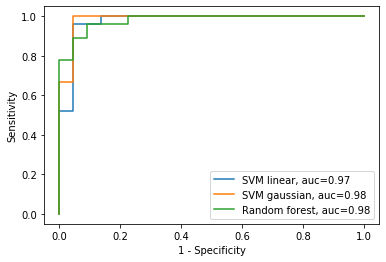

In [78]:
diff_df = df[all_found + final_pca_col]

X_train, X_test, y_train, y_test = train_test_split(diff_df, y, test_size=0.3, random_state=42) 
printTop3ClassificationResults(X_train, X_test, y_train, y_test) #same dataset

getROC(X_train, X_test, y_train, y_test)
plt.savefig('drive/My Drive/FYP/plots/roc9_and_overlapped.png', dpi=400)

In [0]:
# X_train, X_test, y_train, y_test = train_test_split(X_Test[diff_df.columns], y_Test, test_size=0.3, random_state=42) 
# printTop3ClassificationResults(X_train, X_test, y_train, y_test) #same dataset

In [0]:
# saveFoundSymbols(diff_df, "final_found_genes")

Additional compare auuracy of only each feature selection method find symbols


In [38]:
diff_df = df[pca_col]

X_train, X_test, y_train, y_test = train_test_split(diff_df, y, test_size=0.3, random_state=42) 
printTop3ClassificationResults(X_train, X_test, y_train, y_test) #same dataset

						 Testing	 Training
SVM + Gaussian kernel model accuracy(in %) 	: 81.63 	 88.38
SVM + linear kerne model accuracy(in %) 	: 85.71 	 80.37
Random forest model accuracy(in %) 		: 75.51 	 80.37


In [39]:
diff_df = df[rf_col]

X_train, X_test, y_train, y_test = train_test_split(diff_df, y, test_size=0.3, random_state=42) 
printTop3ClassificationResults(X_train, X_test, y_train, y_test) #same dataset

						 Testing	 Training
SVM + Gaussian kernel model accuracy(in %) 	: 81.63 	 85.68
SVM + linear kerne model accuracy(in %) 	: 85.71 	 84.78
Random forest model accuracy(in %) 		: 81.63 	 84.78


In [40]:
diff_df = df[fi_col]

X_train, X_test, y_train, y_test = train_test_split(diff_df, y, test_size=0.3, random_state=42) 
printTop3ClassificationResults(X_train, X_test, y_train, y_test) #same dataset

						 Testing	 Training
SVM + Gaussian kernel model accuracy(in %) 	: 87.76 	 86.56
SVM + linear kerne model accuracy(in %) 	: 87.76 	 82.95
Random forest model accuracy(in %) 		: 79.59 	 82.95


In [41]:
all_found = ['AC004951.6','MAFF', 'SLC39A12', 'PCYOX1L', 'CTD-3092A11.2' ,'RP11-271C24.3',
             'PRO1804' ,'PRR34-AS1']
diff_df = df[all_found]

X_train, X_test, y_train, y_test = train_test_split(diff_df, y, test_size=0.3, random_state=42) 
printTop3ClassificationResults(X_train, X_test, y_train, y_test) #same dataset

						 Testing	 Training
SVM + Gaussian kernel model accuracy(in %) 	: 93.88 	 91.09
SVM + linear kerne model accuracy(in %) 	: 93.88 	 92.82
Random forest model accuracy(in %) 		: 91.84 	 92.82


In [42]:
X_Test = df_Test[all_found]
y_Test = df_Test["class"]
printTop3ClassificationResults(diff_df, X_Test, y, y_Test) #other dataset

						 Testing	 Training
SVM + Gaussian kernel model accuracy(in %) 	: 48.39 	 89.41
SVM + linear kerne model accuracy(in %) 	: 50.0 	 87.56
Random forest model accuracy(in %) 		: 51.61 	 87.56


In [0]:
# pca_col = ['STAT4', 'AMPH', 'ZIC2', 'TAC1', 'TMEM200A', 'SLIRP', 'SLC39A10', 'SPHKAP', 'CALB1', 'CDK7', 'AP2M1', 'PLK2', 'P2RY14', 'EMX2', 'SERPINF1', 'ARPC1A', 'PVALB', 'LOC101060510', 'VAMP7', 'LSM7', 'ATP1A3', 'PCP4', 'EXOC8', 'RIT2', 'BCAS1', 'PSMB4', 'LAMP5', 'PCDH8', 'NRSN1', 'CAPNS1', 'ALAS1', 'RAB33A', 'SLC16A14', 'HACL1']
# rf_col = ['SLC12A7', 'CKMT1B', 'ATP6V1E1', 'ATP5B', 'LOC100272216', 'REEP1', 'CHRM1', 'COPG2IT1', 'TUBB3', 'PSMB3', 'MIF', 'CDK5', 'IMMT', 'PSMA5', 'PLSCR4', 'LRP4', 'BSCL2', 'ATP5C1']
# fi_col = ['TARBP1', 'C2orf80', 'CCNH', 'RNF175', 'EPDR1', 'FAM107B', 'FPGT-TNNI3K', 'DHCR24', 'GLRB', 'TUBA4A', 'HMP19', 'SERPINI1', 'NRXN3', 'SUCLA2', 'SDR16C5', 'C12orf10', 'GRAMD3', 'RPH3A']
# all_found = ['AC004951.6','MAFF', 'SLC39A12', 'PCYOX1L', 'CTD-3092A11.2' ,'RP11-271C24.3',
#             'PRO1804' ,'PRR34-AS1']

def getFeatureSummary(df):

  list0 = ["SVM + Gaussian kernel", "SVM + Linear kernel", "Random forest"]

  count = [len(pca_col),len(rf_col),len(fi_col),len(all_found)]

  diff_df = df[pca_col]

  X_train, X_test, y_train, y_test = train_test_split(diff_df, y, test_size=0.3, random_state=42) 
  list1 = getTop3ClassificationResults(X_train, X_test, y_train, y_test)[:,0] #same dataset

  diff_df = df[rf_col]

  X_train, X_test, y_train, y_test = train_test_split(diff_df, y, test_size=0.3, random_state=42) 
  list2 = getTop3ClassificationResults(X_train, X_test, y_train, y_test)[:,0] #same dataset

  diff_df = df[fi_col]

  X_train, X_test, y_train, y_test = train_test_split(diff_df, y, test_size=0.3, random_state=42) 
  list3 = getTop3ClassificationResults(X_train, X_test, y_train, y_test)[:,0] #same dataset

  diff_df = df[all_found]

  X_train, X_test, y_train, y_test = train_test_split(diff_df, y, test_size=0.3, random_state=42) 
  list4 = getTop3ClassificationResults(X_train, X_test, y_train, y_test)[:,0] #same dataset

  rows = ["classifier","PCA", "Random Forest", "Extra Tree", "Overlap"]

  data = np.array([list0,list1, list2,list3, list4])
  results = pd.DataFrame(data=data, index=rows).transpose()

  results = results.set_index('classifier')

  df_count = pd.DataFrame({'id':rows[1:5], 'val':count})

  return results, df_count

In [0]:
results, count = getFeatureSummary(df)
results = results.astype(float)

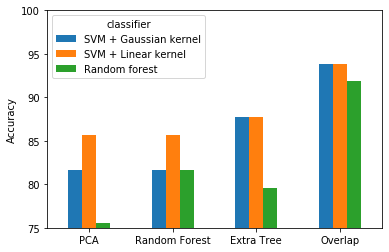

In [45]:
results.T.plot.bar(rot=0)
axes = plt.gca()
axes.set_ylim([75,100])
axes.set_ylabel("Accuracy")
plt.savefig('drive/My Drive/FYP/plots/with_overlap.png', dpi=400)

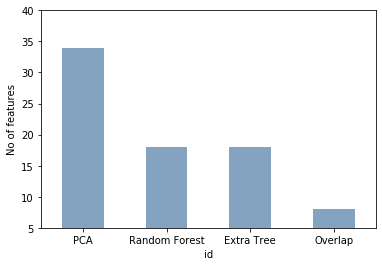

In [46]:
count.plot.bar(x='id', y='val', rot=0,color=(0.2, 0.4, 0.6, 0.6))
axes = plt.gca()
axes.set_ylim([5,40])
axes.set_ylabel("No of features")
axes.get_legend().remove()
plt.savefig('drive/My Drive/FYP/plots/with_overlap_no.png', dpi=400)

Compare correlation of them

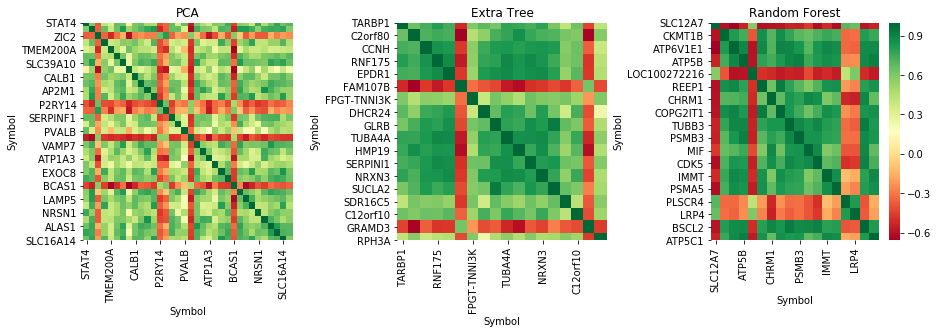

In [47]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

cmp_corr_pca = df[pca_col].corr()
sns.heatmap(cmp_corr_pca, cmap="RdYlGn", ax=ax1, cbar=False)
ax1.set_title("PCA")

cmp_corr_fi = df[fi_col].corr()
sns.heatmap(cmp_corr_fi, cmap="RdYlGn", ax=ax2, cbar=False)
ax2.set_title("Extra Tree")

cmp_corr_rf = df[rf_col].corr()
sns.heatmap(cmp_corr_rf, cmap="RdYlGn", ax=ax3)
ax3.set_title("Random Forest")

fig.subplots_adjust(wspace = 0.5)
fig.set_figwidth(15)

In [0]:
# fig.savefig('drive/My Drive/FYP/plots/corr_all3.png', dpi=400)

In [0]:
def getHighlyCorrelatedFeatures(corr, i):
  # Select upper triangle of correlation matrix
  upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

  # Find index of feature columns with correlation greater than 0.95
  to_drop = [column for column in upper.columns if any(upper[column] > i)]

  return to_drop

In [50]:
getHighlyCorrelatedFeatures(cmp_corr_fi,0.85)

['EPDR1', 'GLRB', 'TUBA4A', 'HMP19', 'SERPINI1', 'NRXN3', 'SUCLA2']

In [0]:
def compareCorrelatedFeatures(cmp_corr_pca, cmp_corr_fi,cmp_corr_rf):
  lists0 = []
  lists1 = []
  lists2 = []
  lists3 = []

  i = 0.95

  while i >= 0.8:

    lists0.append(i)
    lists1.append(len(getHighlyCorrelatedFeatures(cmp_corr_pca,i))*100/34)
    lists2.append(len(getHighlyCorrelatedFeatures(cmp_corr_rf,i))*100/18)
    lists3.append(len(getHighlyCorrelatedFeatures(cmp_corr_fi,i))*100/18)

    i = i - 0.005

  rows = ["Correlation value", "PCA", "Random Forest", "Extra Tree"]

  data = np.array([lists0, lists1, lists2,lists3])
  results = pd.DataFrame(data=data, index=rows).transpose()
  results = results.set_index('Correlation value')

  return results

Text(0.5, 1.0, 'Correlated Features vs correlation value')

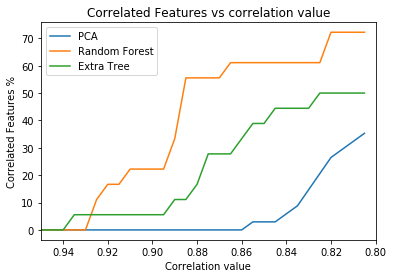

In [52]:
results = compareCorrelatedFeatures(cmp_corr_pca, cmp_corr_fi,cmp_corr_rf)
g = results.plot.line()
g.set(xlim=(0.95,0.80))
g.set_ylabel("Correlated Features %")
g.set_title("Correlated Features vs correlation value")

In [0]:
fig = g.get_figure()
fig.savefig('drive/My Drive/FYP/plots/corr_featVvalue.png', dpi=400)

In [0]:
corr_200 = df.corr()

In [0]:
def getSimiliarFeatures(df, arr, ran):
  result = []
  for e in arr:
    for i in range(len(df)):
      if abs(df[e][i]) > ran:
        # print (corr_200["AC004951.6"].index[i])
        result.append(df[e].index[i])

  return result

In [56]:
sim_gene = getSimiliarFeatures(corr_200,['ATP6V1E1' ,'MDH1' ,'COPS5'], 0.95)
sim_df = pd.DataFrame(data=sim_gene, columns=["probes.Symbol"])
sim_df = pd.DataFrame(data = sim_df['probes.Symbol'].unique(), columns=['probes.Symbol'])
sim_df.to_pickle("drive/My Drive/FYP/Found genes/" + "top8Similiar_brain" +".pkl")
sim_df.shape

(3, 1)

Similiar feature plot

In [57]:
sim_gene = getSimiliarFeatures(corr_200,all_found + final_pca_col,0.75)
# print(sim_gene)
sim_df = pd.DataFrame(data=sim_gene, columns=["probes.Symbol"])
sim_df = pd.DataFrame(data = sim_df['probes.Symbol'].unique(), columns=['probes.Symbol'])
# sim_df.to_pickle("drive/My Drive/FYP/Found genes/" + "similiar_final_found" +".pkl")
sim_df.shape

(127, 1)

In [58]:
df = pd.read_csv("drive/My Drive/FYP/dataset/ADRelatedGene.txt", delimiter=", ")
df_AD = pd.DataFrame()
df_AD["probes.Symbol"] = df.columns

df_AD["probes.Symbol"] = df_AD['probes.Symbol'].str.replace(" ","")

#df_AD.head()
print(len(df_AD["probes.Symbol"].values))
df_AD["probes.Symbol"].values

8233


array(['IL23R', 'IL26', 'IL27', ..., 'TGFBR1', 'ZNF365', 'VDAC2'],
      dtype=object)

In [59]:
result = pd.merge(df_AD, sim_df, on='probes.Symbol', how='inner')
arr = result["probes.Symbol"].values
print(len(arr))
print(arr)

64
['MKKS' 'NAP1L5' 'HSP90AB1' 'IMMT' 'MAP2K1' 'MAP2K4' 'MAL2' 'MDH1' 'LRP4'
 'GOT1' 'GLOD4' 'GLRB' 'GPI' 'CDK5' 'CHGB' 'EPB41L3' 'EPDR1' 'CALY'
 'CACNA2D3' 'AMPH' 'ATP1A1' 'ATP6V0B' 'ATP6V1E1' 'FHL2' 'GABRG2' 'COPS5'
 'NPTX2' 'PLK2' 'PSMD8' 'SCG2' 'SERTM1' 'SLC35B1' 'SLC39A12' 'SMYD3'
 'SNCA' 'SLC9A6' 'SST' 'STMN2' 'SGIP1' 'NDRG4' 'NEAT1' 'NECAP1' 'NIT2'
 'NME1' 'PSMA5' 'PSMB4' 'NRXN3' 'MT1M' 'NRN1' 'NEFL' 'PCDH8' 'APOO' 'CCK'
 'DHCR24' 'TUBA4A' 'TUBB3' 'TUBB4B' 'TM2D2' 'TM9SF2' 'VSNL1' 'TAF9'
 'TARBP1' 'TRMT10C' 'ZDHHC23']


In [60]:
sim_df.shape[0]

127

In [0]:
def getSimiliarAndAD():
  i = 0.95

  lists0 = []
  lists1 = []
  lists2 = []

  while i >= 0.8:

    sim_gene = getSimiliarFeatures(corr_200,all_found + final_pca_col,i)

    sim_df = pd.DataFrame(data=sim_gene, columns=["probes.Symbol"])
    sim_df = pd.DataFrame(data = sim_df['probes.Symbol'].unique(), columns=['probes.Symbol'])

    result = pd.merge(df_AD, sim_df, on='probes.Symbol', how='inner')
    arr = result["probes.Symbol"].values

    lists0.append(i)
    lists1.append(sim_df.shape[0])
    lists2.append(len(arr))

    i = i - 0.001

  rows = ["Correlation coefficient", "Correlated gene", "Gene card"]

  data = np.array([lists0, lists1, lists2])
  results = pd.DataFrame(data=data, index=rows).transpose()

  results = results.set_index('Correlation coefficient')

  return results

In [0]:
sim_summary_df = getSimiliarAndAD()

In [63]:
sim_summary_df.head()

,Correlated gene,Gene card
Correlation coefficient,,
0.950,15.0,4.0
0.949,15.0,4.0
0.948,15.0,4.0
0.947,15.0,4.0
0.946,15.0,4.0


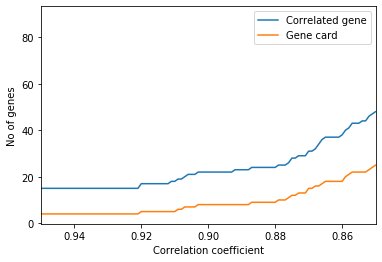

In [64]:
g = sim_summary_df.plot.line()
g.set(xlim=(0.95,0.85))
g.set_ylabel("No of genes")

fig = g.get_figure()
fig.savefig('drive/My Drive/FYP/plots/final_iden_geneCard.png', dpi=400)